In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numba

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df=pd.read_csv('/content/ps.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [ ]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Null Check

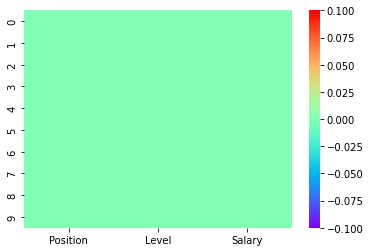

In [ ]:
sns.heatmap(df.isnull(), yticklabels=True,cmap="rainbow")

**Do we Need Encoding ?**

In [ ]:
X=df.iloc[:,1:2]
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
Y=df.iloc[:,2:]
Y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


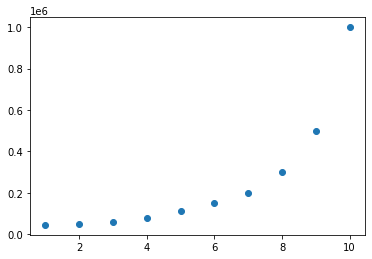

In [ ]:
plt.scatter(X,Y)

Ready for split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
LR=LinearRegression()


In [ ]:
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
Y_pred=LR.predict(x_test)
score=r2_score(y_test,Y_pred)
score

0.8451346684575974

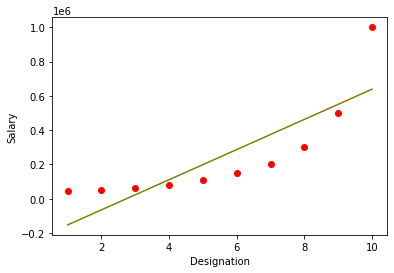

In [ ]:
plt.scatter(X,Y,c="red")
plt.plot(X,LR.predict(X),c="olive")
plt.xlabel("Designation")
plt.ylabel("Salary")
plt.show()

In [ ]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
label=float(input())
LR.predict([[label]])

5


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[199181.03448276]])

# **Polynomial Regression of Degree 2**

In [ ]:
df=pd.read_csv('/content/ps.csv')
X=df.iloc[:,1:2]
Y=df.iloc[:,2:]
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
X.shape

(10, 6)

In [ ]:
Y.shape

(10, 1)

In [ ]:
PF=PolynomialFeatures(degree=2)
X=PF.fit_transform(X)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
PR2=LinearRegression()
PR2.fit(X_train,Y_train)
Y_pred=PR2.predict(X_test)
score=r2_score(Y_test,Y_pred)
score


0.7896604512664267

Degree=5

In [ ]:
df=pd.read_csv('/content/ps.csv')
X=df.iloc[:,1:2]
Y=df.iloc[:,2:]

In [ ]:
X.shape

(10, 6)

In [ ]:
Y.shape

(10, 1)

In [ ]:
PF5=PolynomialFeatures(degree=5)
X=PF5.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
PR5=LinearRegression()
PR5.fit(X_train,Y_train)
Y_pred=PR5.predict(X_test)
score=r2_score(Y_test,Y_pred)
score


0.994907850329467

In [ ]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X=df.iloc[:,1:2]

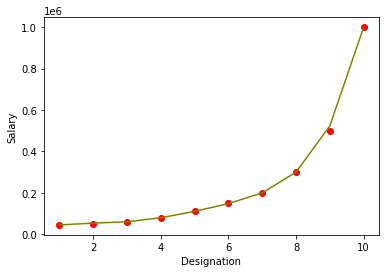

In [ ]:
plt.scatter(X,Y,c="red")
plt.plot(X,PR5.predict(PF.fit_transform(X)),c="olive")
plt.xlabel("Designation")
plt.ylabel("Salary")
plt.show()

In [ ]:
level=float(input())
PR5.predict(PF.fit_transform([[level]]))

9


array([[523466.91613959]])